In [32]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords


In [59]:
pipe = Pipeline(
    steps=[
        ("vectorizer", CountVectorizer(stop_words=stopwords.words("english"), max_df=0.5, min_df=10, max_features=10000)),
        ("model", LatentDirichletAllocation(n_components=5, n_jobs=-1))
    ]
)

In [3]:
df = pd.read_csv("val_with_scores.csv")

In [4]:
df.head()

,name,description,score,predictions
0,BASIC PLAIN SWEATSHIRT,Long sleeve sweatshirt with a round neckline a...,0.000000,"['BASIC SWEATSHIRT', 'SOFT-TOUCH SWEATSHIRT', ..."
1,CHAMOMILE BODY CARE KIT,"In the Chamomile personal care kit, you will f...",0.000000,"['CHAMOMILE PERSONAL CARE KIT', 'CHAMOMILE LIQ..."
2,ANIMAL PRINT POLO SHIRT WITH SPARKLY TRIM,Collared knit polo shirt featuring short sleev...,0.315465,['ANIMAL PRINT POLO SHIRT WITH SPARKLY THREAD'...
3,TEXTURED LACE TOP TRF,Semi-sheer top featuring a round neckline with...,0.000000,"['TEXTURED WEAVE TOP', 'TEXTURED WEAVE TOP TRF..."
4,PRINTED COTTON CUSHION COVER,Cotton cushion cover with a contrast print and...,0.500000,"['PRINTED CUSHION COVER', 'COTTON CUSHION COVE..."


In [6]:
df[df["score"]==0].shape[0] / df.shape[0]

0.7238890998860615

In [8]:
df.sort_values(by="score", ascending=False)

,name,description,score,predictions
1316,WASHED COTTON BLANKET,Washed cotton blanket with fringing.,1.0,"['WASHED COTTON BLANKET', 'WASHED COTTON BLANK..."
2115,SPORTY TIE-DYE T-SHIRT,Sporty tie-dye fabric T-shirt featuring a roun...,1.0,"['SPORTY TIE-DYE T-SHIRT', 'SPORTY T-SHIRT WIT..."
777,SILICONE SERVING SPOON,Silicone serving spoon.,1.0,"['SILICONE SERVING SPOON', 'SILK SERVING SPOON..."
780,CHERRY WATERMELON ICE AROMATIC CANDLE 200 G,ZARA CHERRY WATERMELON ICE AROMATIC CANDLE 200...,1.0,['CHERRY WATERMELON ICE AROMATIC CANDLE 200 G'...
261,OVAL JUTE RUG,Oval jute rug with contrast polka dots.,1.0,"['OVAL JUTE RUG', 'OVAL JUTE RUG WITH POLKA DO..."
...,...,...,...,...
1015,ANIMAL PRINT POPLIN TOP TRF,V-neck crop top with long sleeves and puff sho...,0.0,"['PRINTED CROPPED TOP TRF', 'PRINTED CROP TOP ..."
1012,TEXTURED STRIPED TOP,Top featuring a round neckline and ruffled str...,0.0,"['STRIPED TOP WITH RUFFLES', 'STRIPED TOP WITH..."
1011,RIBBED ONE-PIECE SUIT,Long sleeve one-piece suit with round neckline...,0.0,"['TEXTURED ONE-PIECE SUIT', 'STRIPED ONE-PIECE..."
1010,CONTRASTING BLOUSE WITH DOTTED MESH,"Blouse with a puritan collar, velvet trim deta...",0.0,"['EMBROIDERED POLKA DOT BLOUSE', 'POLKA DOT BL..."


In [9]:
lens_0 = [len(text.split(" ")) for text in df[df["score"]==0]["description"].tolist()]

In [10]:
sum(lens_0) / len(lens_0)

21.579748163693598

In [11]:
lens_not_0 = [len(text.split(" ")) for text in df[df["score"]>0]["description"].tolist()]

In [12]:
sum(lens_not_0) / len(lens_not_0)

23.19532324621733

In [13]:
lens_1 = [len(text.split(" ")) for text in df[df["score"]==1]["description"].tolist()]

In [14]:
sum(lens_1) / len(lens_1)

24.623417721518987

In [15]:
pd.DataFrame({"len": lens_0}).describe()

,len
count,1906.000000
mean,21.579748
std,19.093861
min,1.000000
25%,12.000000
50%,18.000000
75%,25.000000
max,277.000000


In [16]:
pd.DataFrame({"len": lens_not_0}).describe()

,len
count,727.000000
mean,23.195323
std,33.003971
min,2.000000
25%,8.000000
50%,14.000000
75%,26.000000
max,284.000000


In [17]:
pd.DataFrame({"len": lens_1}).describe()

,len
count,316.000000
mean,24.623418
std,37.112022
min,2.000000
25%,7.000000
50%,13.500000
75%,27.000000
max,284.000000


In [18]:
test = pd.read_csv("test.csv")

In [19]:
lens_test = [len(text.split(" ")) for text in test["description"].tolist()]

In [20]:
pd.DataFrame({"len": lens_test}).describe()

,len
count,1441.000000
mean,24.238723
std,19.201669
min,2.000000
25%,11.000000
50%,20.000000
75%,34.000000
max,236.000000


In [21]:
train = pd.read_csv("train_0802.csv")

In [60]:
pipe.fit(train["description"])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.5, max_features=10000, min_df=10,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model',
                 LatentDirichletAllocation(n_components=5, n_jobs=-1))])

In [61]:
pipe["model"].components_

array([[  0.20000064,   0.20000069,   0.20000058, ...,  11.18238149,
        111.10643627,   0.20002103],
       [  0.20170391,   0.20380271,   0.20066597, ...,   0.20007675,
          0.20007155,   0.20046263],
       [  5.49680909,  24.19619224,  18.19932961, ...,   0.20000504,
          0.20037174,  14.19720489],
       [  9.90107872,   0.20000229,   0.20000201, ...,   0.20000684,
          0.21242038,   0.20021553],
       [  0.20040764,   0.20000207,   0.20000183, ...,   1.21752988,
         15.28070006,   0.20209591]])

In [62]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 30
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

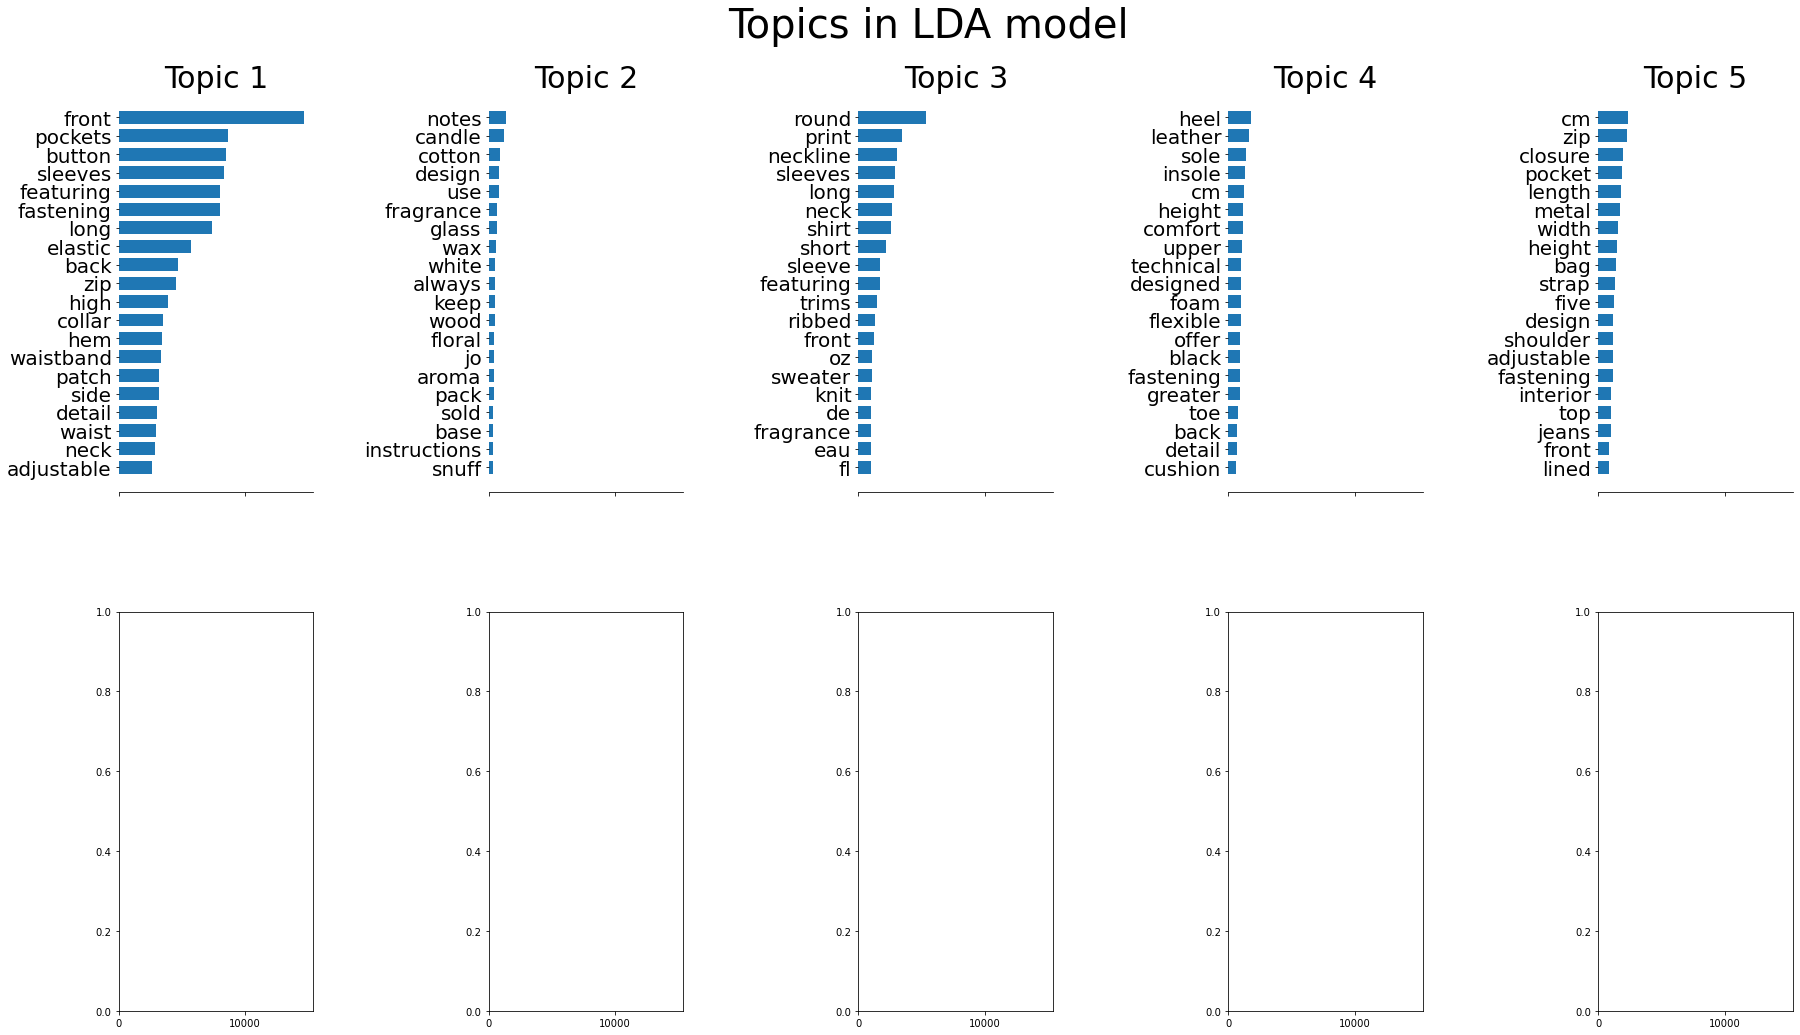

In [63]:
tf_feature_names = pipe["vectorizer"].get_feature_names()
plot_top_words(pipe["model"], tf_feature_names, n_top_words, 'Topics in LDA model')

In [64]:
preds_val = pipe.transform(df["description"])

In [65]:
df["topic"] = preds_val.argmax(-1)

In [66]:
df.groupby("topic")["score"].mean()

topic
0    0.080079
1    0.383937
2    0.191164
3    0.169775
4    0.230013
Name: score, dtype: float64

In [67]:
df.groupby("topic").count() / df.shape[0]

,name,description,score,predictions
topic,,,,
0,0.364603,0.364603,0.364603,0.364603
1,0.216483,0.216483,0.216483,0.216483
2,0.225218,0.225218,0.225218,0.225218
3,0.104444,0.104444,0.104444,0.104444
4,0.089252,0.089252,0.089252,0.089252


In [68]:
test["topic"] = pipe.transform(test["description"]).argmax(-1)

In [69]:
test.groupby("topic").count() / test.shape[0]

,description,name
topic,,
0,0.058293,0.058293
1,0.362942,0.362942
2,0.093685,0.093685
3,0.362248,0.362248
4,0.122831,0.122831


In [70]:
[name for name in df["name"] if "scented" in name.lower()]

['(200 G) WILD BAMBOO SCENTED CANDLE',
 'CHAI TEA SCENTED CANDLE (250 G)',
 'BASILICUM SCENTED CANDLE (500 G)',
 'CUIR NUIT SCENTED CANDLE (180 G)',
 'ESSENCE DE ROSE SCENTED CANDLE',
 'WHITE JASMINE SCENTED CARDS',
 'CHIMNEY SCENTED CANDLE (550 G)',
 'CEDAR WOOD SCENTED REED DIFFUSERS (1.69\xa0oz)',
 'CURIOUS FORTUNE SCENTED CANDLE',
 'GREEN HERBS SCENTED CANDLE (620 G)',
 'SCENTED LINEN BAG',
 'CUIR NUIT SCENTED CANDLE (500 G)',
 'ETERNAL MUSK SCENTED REED DIFFUSERS (3.38\xa0oz)',
 'PALO SANTO SCENTED CANDLE (500 G)',
 'GREEN HERBS SCENTED CANDLE (200 G)',
 'SCENTED CARDS CONVERSATIONS AT 10 PM',
 'ABSOLUTE LINEN SCENTED CANDLE (190 G)',
 'RED BERRIES SCENTED CANDLE']